<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/RandomForestTestDroughtPrediction200k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset100K/Data_COMBINED200k/201505-202309.csv")
dataset

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,soil_moisture_am,soil_moisture_pm,soil_moisture_am_anomaly,soil_moisture_pm_anomaly,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03
0,0,201505,2.695,36.831,292.897,284.173,306.818,286.393,0.017408,0.0,...,0.105567,0.085525,NaN,NaN,3372.96,2213.50,296.440,0.000012,-1.691230,-1.961670
1,1,201505,4.492,36.831,291.509,281.289,307.803,284.749,0.021208,0.0,...,0.182647,0.146752,NaN,NaN,3204.50,2178.00,296.346,0.000011,-1.675480,-1.874810
2,2,201505,6.288,36.831,291.982,280.979,310.320,285.078,0.040932,0.0,...,0.198131,0.195196,NaN,NaN,3771.80,2545.19,295.924,0.000008,-1.147220,-1.466250
3,3,201505,8.085,36.831,292.651,282.872,311.148,285.349,0.040176,0.0,...,0.216229,0.195139,NaN,NaN,3253.83,2270.80,296.594,0.000002,-0.818641,-1.169820
4,4,201505,9.881,36.831,293.875,283.338,311.430,284.019,0.018553,0.0,...,0.120545,0.096890,-0.000057,-0.007937,2806.25,1962.62,296.823,0.000001,-1.383910,-1.045240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84633,833,202309,20.661,-33.238,283.751,271.247,299.778,274.649,0.064461,0.0,...,0.114669,0.142096,0.009036,0.015611,2691.06,1399.05,289.569,0.000014,2.631480,1.608050
84634,834,202309,22.458,-33.238,285.763,273.935,307.381,274.665,0.068179,0.0,...,0.148443,0.153095,-0.007026,0.010275,2475.70,1238.78,290.677,0.000014,2.011490,1.070890
84635,835,202309,24.255,-33.238,287.129,274.357,309.538,275.504,0.068026,0.0,...,0.130389,0.146193,-0.000883,-0.008633,2656.24,1294.36,290.756,0.000013,1.811690,1.375040
84636,836,202309,26.051,-33.238,287.760,276.712,308.603,279.086,0.075859,0.0,...,0.144731,0.146986,-0.016764,-0.006238,4674.79,2363.62,291.747,0.000014,1.394530,0.768887


In [ ]:
dataset.describe()

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,soil_moisture_am,soil_moisture_pm,soil_moisture_am_anomaly,soil_moisture_pm_anomaly,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03
count,84638.00000,84638.000000,84638.000000,84638.000000,84638.000000,84638.000000,84638.000000,84638.000000,84638.000000,84638.000000,...,84421.000000,84436.000000,76114.000000,76198.000000,84638.000000,84638.000000,84537.000000,8.453700e+04,84586.000000,84591.000000
mean,418.50000,201910.485149,18.650241,6.448996,297.677093,288.792088,307.381539,283.666575,0.053298,0.000054,...,0.151556,0.144170,-0.001593,-0.001336,3415.812121,2131.514920,298.589500,2.582263e-05,-0.650846,-0.767688
std,241.91102,244.868580,15.857068,17.745994,5.727714,6.666926,5.694939,8.841274,0.088509,0.000232,...,0.126400,0.114111,0.022978,0.022344,2343.646642,1407.390932,5.666795,4.194246e-05,1.346339,1.288750
min,0.00000,201505.000000,-24.255000,-33.238000,272.097000,258.898000,281.999000,259.118000,0.000016,0.000000,...,0.020000,0.020048,-0.233316,-0.239027,489.180000,326.296000,277.836000,0.000000e+00,-5.000000,-5.000000
25%,209.00000,201706.000000,8.085000,-6.288000,294.442000,284.658000,303.532250,276.236000,0.000226,0.000000,...,0.050135,0.055985,-0.008672,-0.007787,1138.572500,855.978500,295.632000,5.445160e-08,-1.503807,-1.615155
50%,418.50000,201907.000000,20.661000,9.881000,298.156000,290.400000,307.051000,284.341000,0.006254,0.000000,...,0.107061,0.098775,-0.000964,-0.000843,2820.675000,1687.005000,299.075000,3.701290e-06,-0.674987,-0.855163
75%,628.00000,202108.000000,31.441000,20.661000,301.267000,293.986000,311.587000,291.810000,0.075884,0.000001,...,0.219742,0.206586,0.004709,0.004854,5481.620000,3263.335000,302.220000,3.568740e-05,0.244335,0.073512
max,837.00000,202309.000000,51.204000,36.831000,313.569000,302.859000,322.431000,298.408000,1.148110,0.006530,...,0.668410,0.650569,0.226379,0.244806,8742.230000,6458.600000,313.910000,3.350020e-04,5.000000,5.000000


In [ ]:
dataset.isna().sum()

Unnamed: 0                            0
Month                                 0
Lat                                   0
Lon                                   0
temperature_2m                        0
temperature_2m_min                    0
temperature_2m_max                    0
dewpoint_temperature_2m               0
total_precipitation_sum               0
total_precipitation_min               0
total_precipitation_max               0
u_component_of_wind_10m               0
v_component_of_wind_10m               0
surface_net_solar_radiation_sum       0
total_evaporation_sum                 0
soil_moisture_am                    217
soil_moisture_pm                    202
soil_moisture_am_anomaly           8524
soil_moisture_pm_anomaly           8440
NDVI                                  0
EVI                                   0
next_month_tempreature              101
next_month_precipitation            101
spei01                               52
spei03                               47


In [ ]:
dataset = dataset.drop(["soil_moisture_am_anomaly", "soil_moisture_pm_anomaly"], axis = 1)

In [ ]:
dataset.dropna(subset=['spei01', 'spei03', 'next_month_precipitation', 'next_month_tempreature', 'EVI', 'NDVI', "soil_moisture_am", "soil_moisture_pm"], inplace=True)

In [ ]:
dataset.isna().sum()

NameError: ignored

In [ ]:
len(dataset)

84416

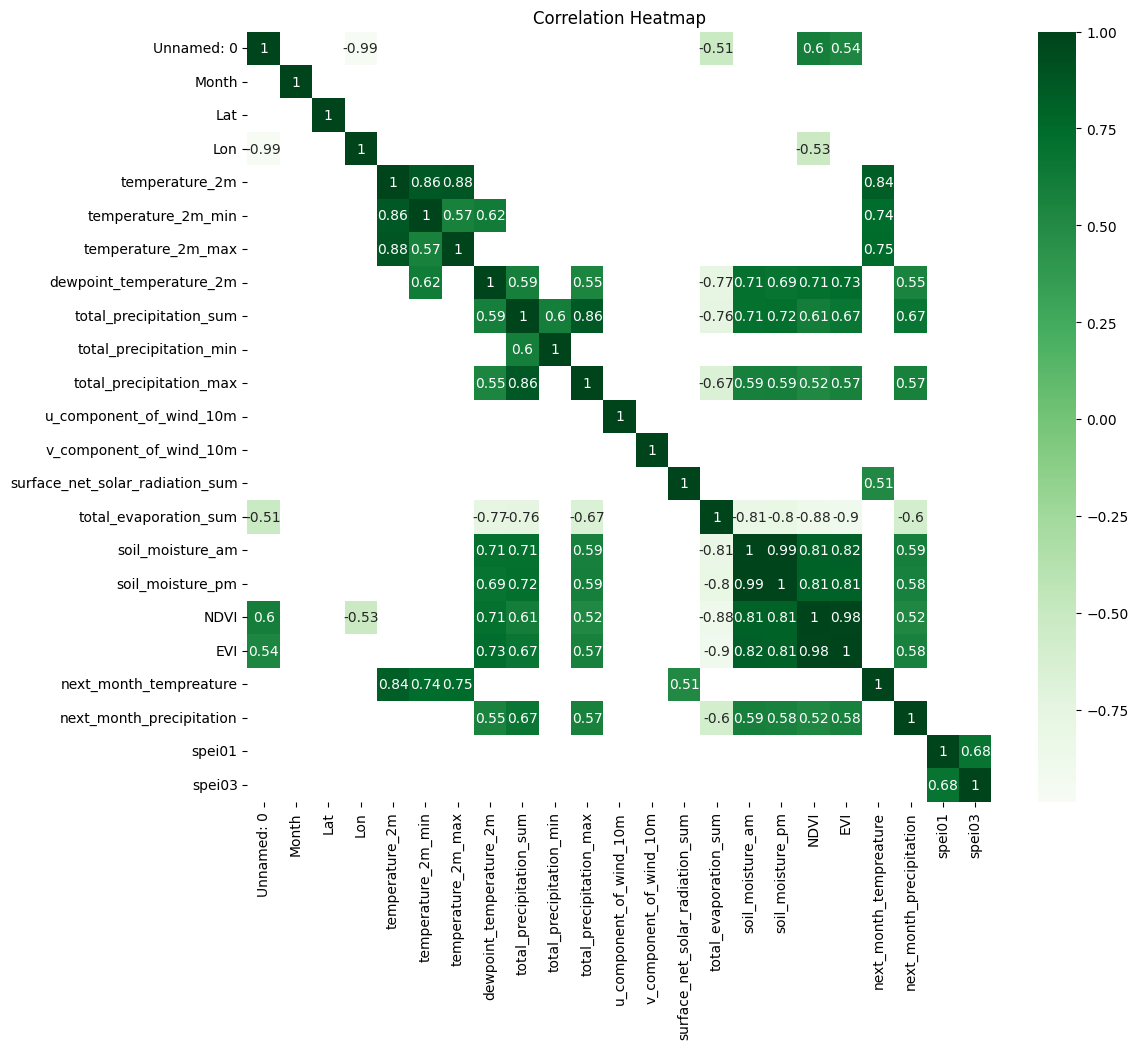

In [ ]:
correlation_matrix = dataset.corr()

filtered_correlations = correlation_matrix[(correlation_matrix <= -0.5) | (correlation_matrix >= 0.5)]

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlations, annot=True, cmap='Greens', center=0)
plt.title("Correlation Heatmap")
plt.show()

- Longitude is moderately inversely correlated to NDVI
- Average temperature this month is strongly correlated to average temperature the following month
- Average temperature is strongly correlated to minimum and maximum temperature
- Dewpoint temperature is strongly correlated with NDVI, EVI, and soil moisture. It is moderately correlated with next month precipitation, past month precipitation, and past month temperature
- Total past month precipitation is strongly correlated with soil moisture, maximum precipitation, and dewpoint temperature
- NDVI and EVI are strongly correlated with soil moisture


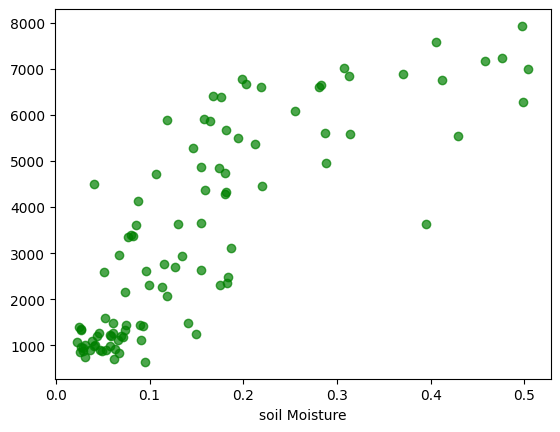

In [ ]:
import random

sample_df = dataset.sample(n=100, axis='rows')

soil_moisture = sample_df["soil_moisture_am"]
NDVI_sample = sample_df["NDVI"]

plt.scatter(soil_moisture, NDVI_sample, c="green", alpha=0.7)
plt.xlabel("soil Moisture")

plt.show()

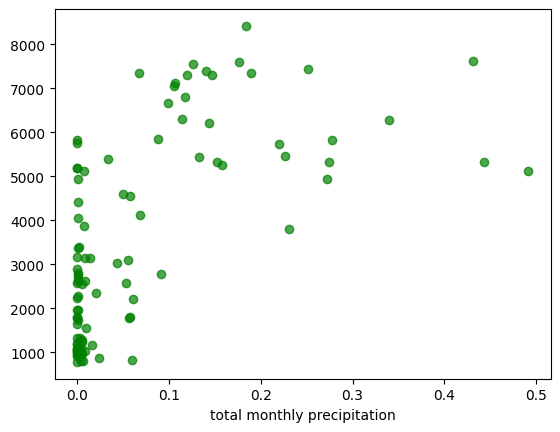

In [ ]:
sample_df = dataset.sample(n=100, axis='rows')

total_precipitation_sample = sample_df["total_precipitation_sum"]
NDVI_sample = sample_df["NDVI"]

plt.scatter(total_precipitation_sample, NDVI_sample, c="green", alpha=0.7)
plt.xlabel("total monthly precipitation")

plt.show()

<ipython-input-11-d8f96d5f0668>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


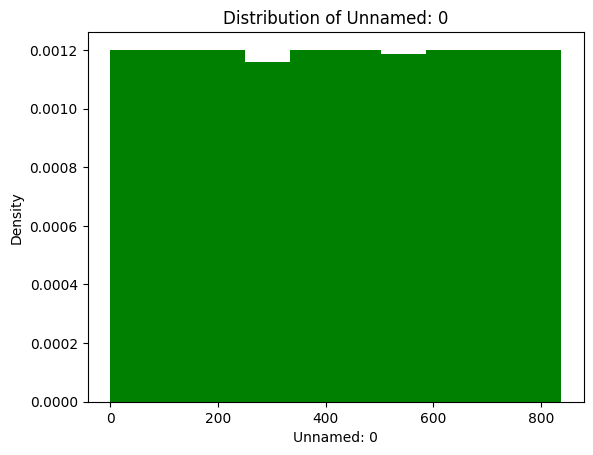

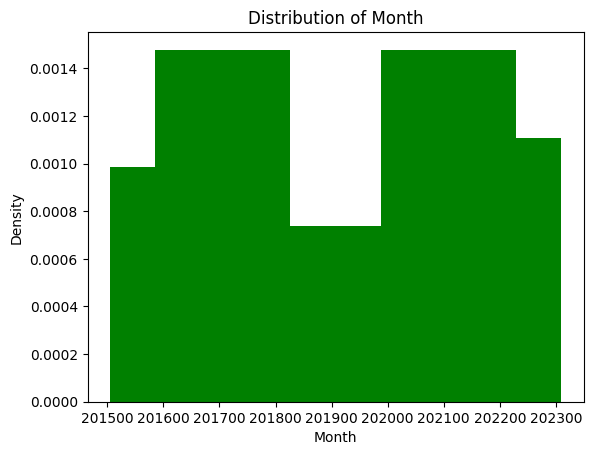

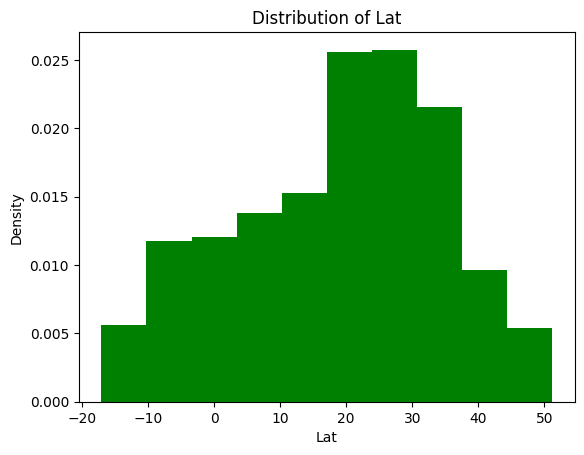

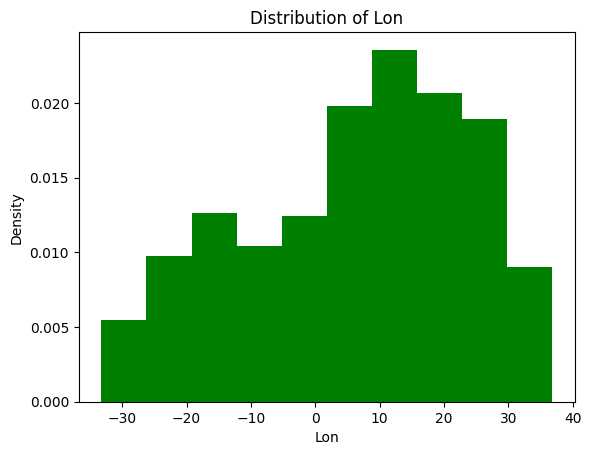

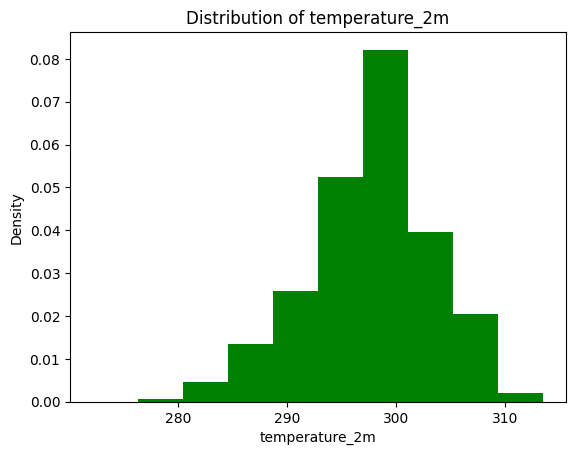

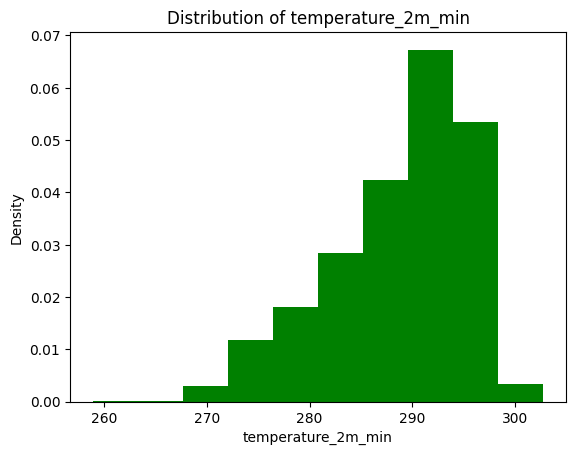

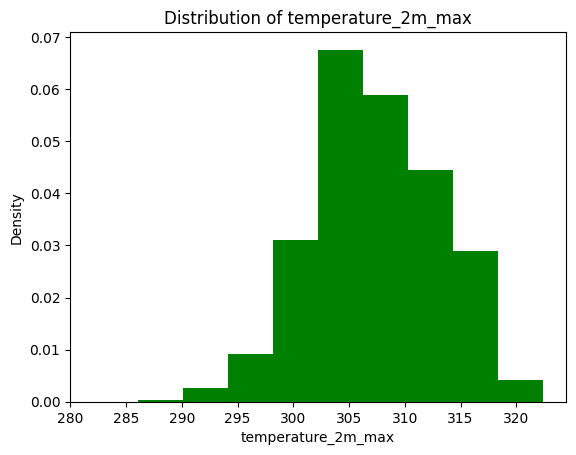

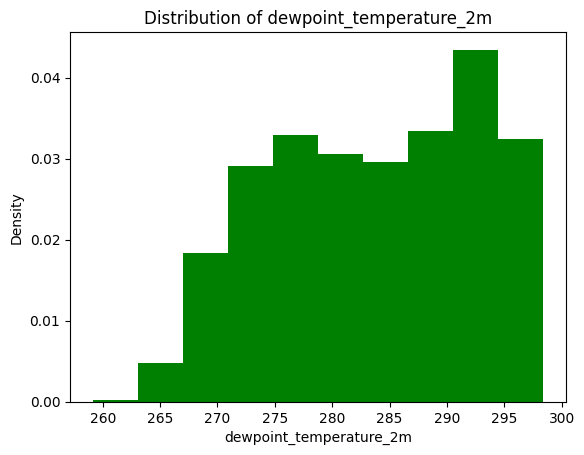

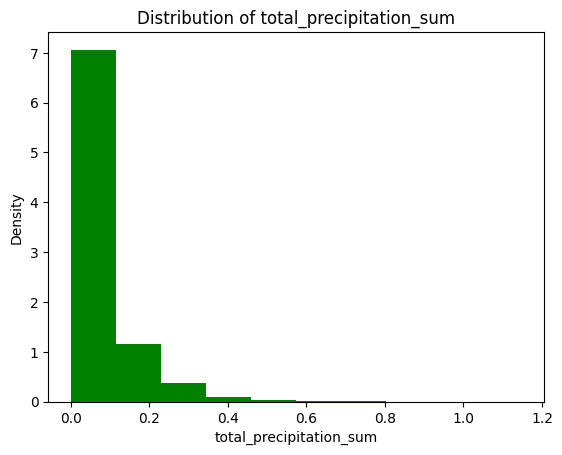

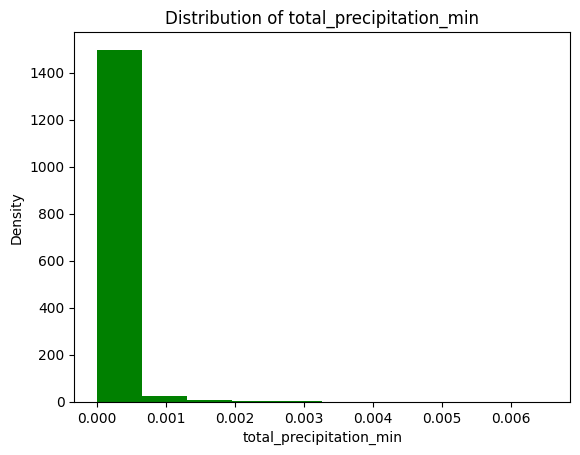

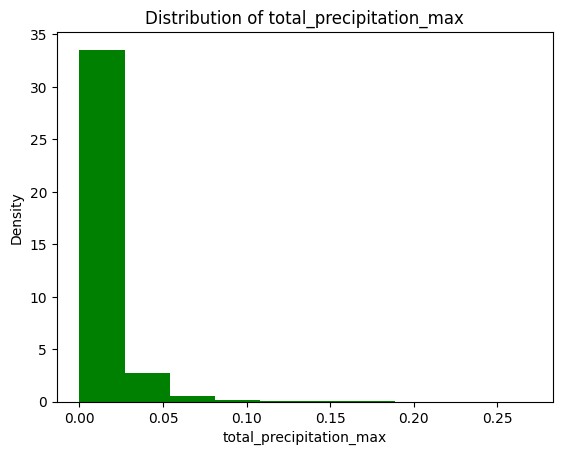

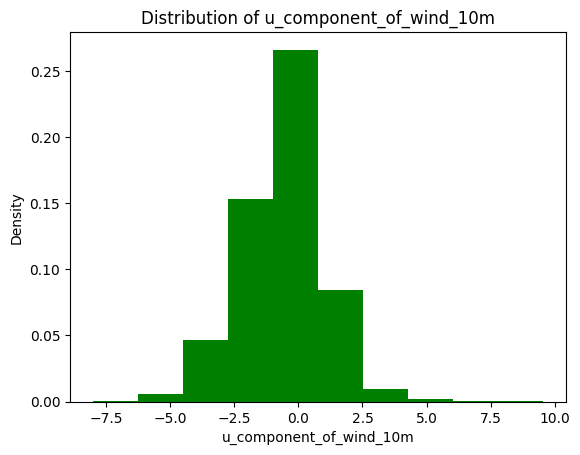

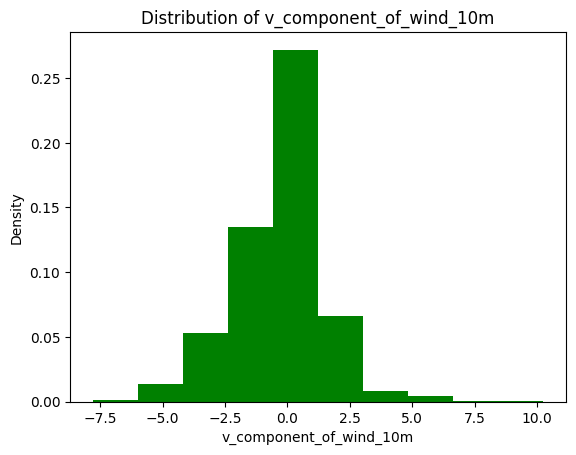

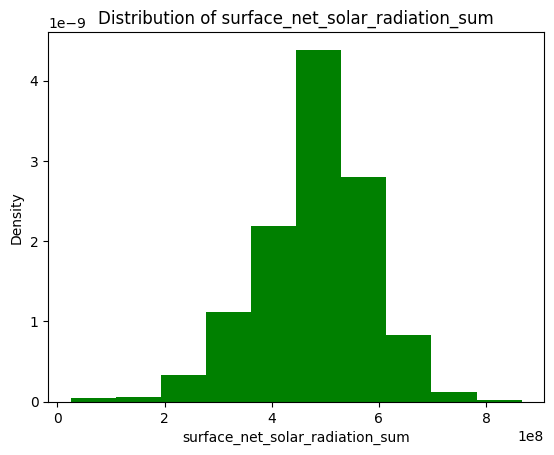

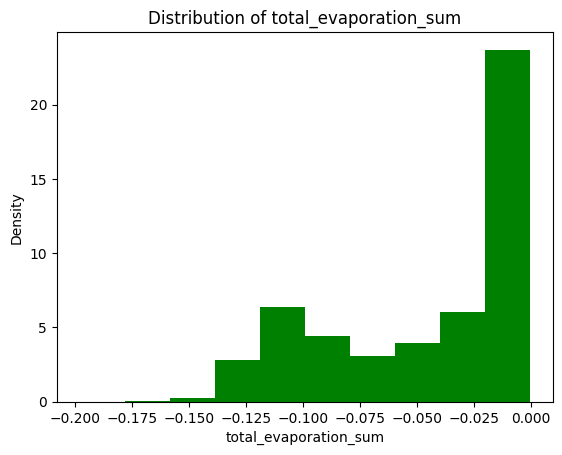

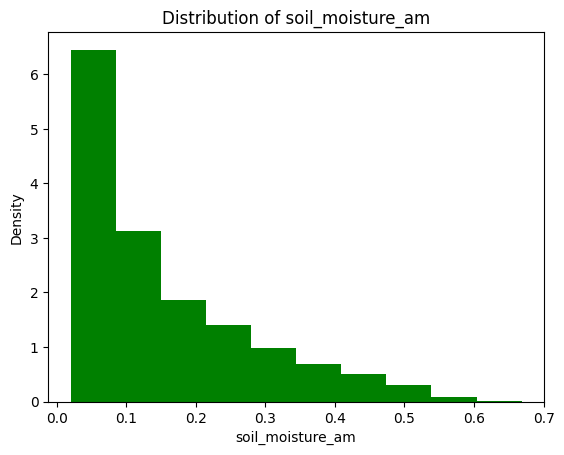

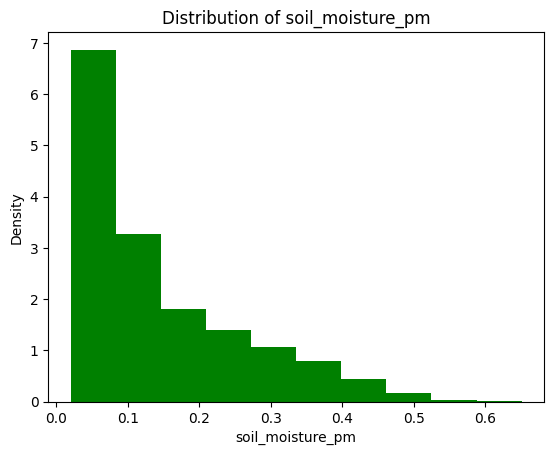

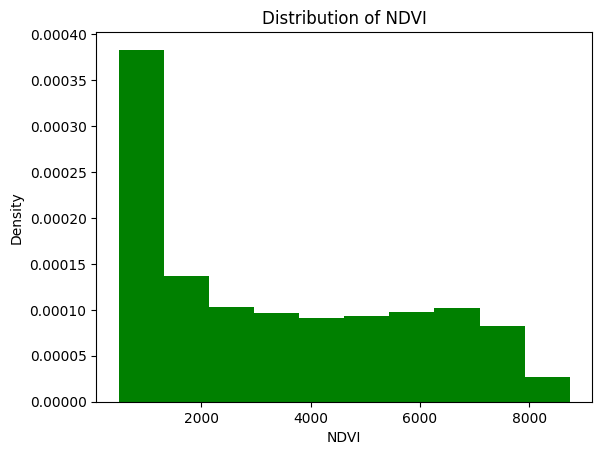

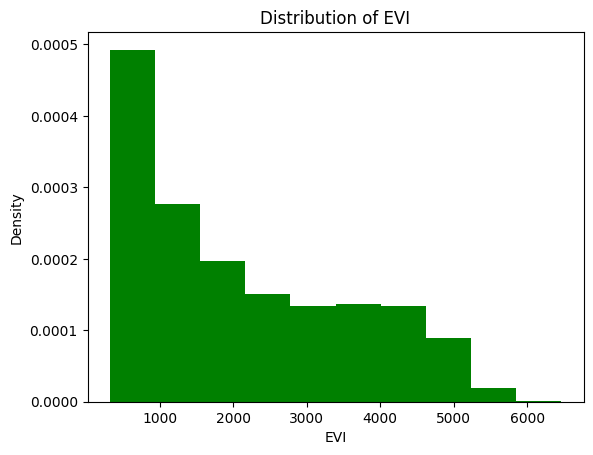

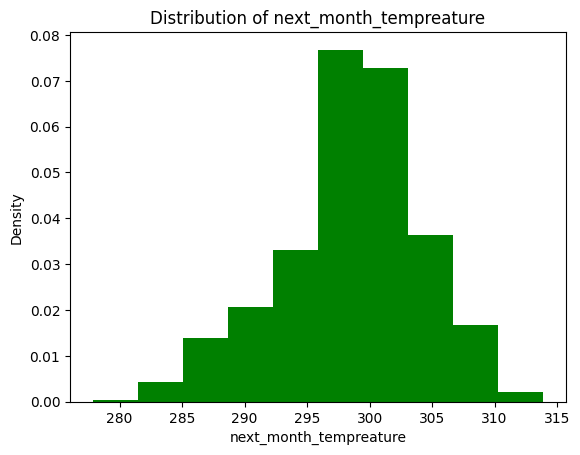

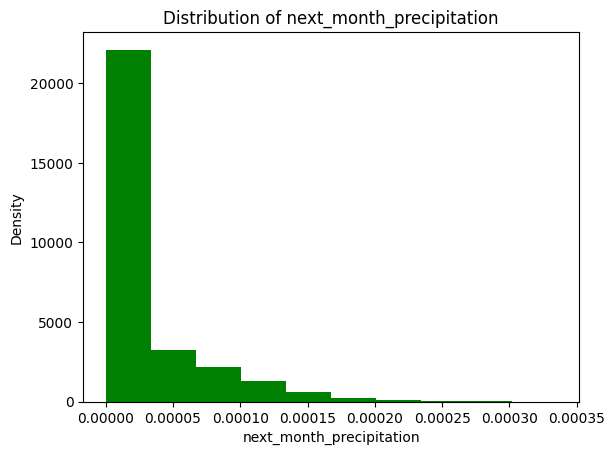

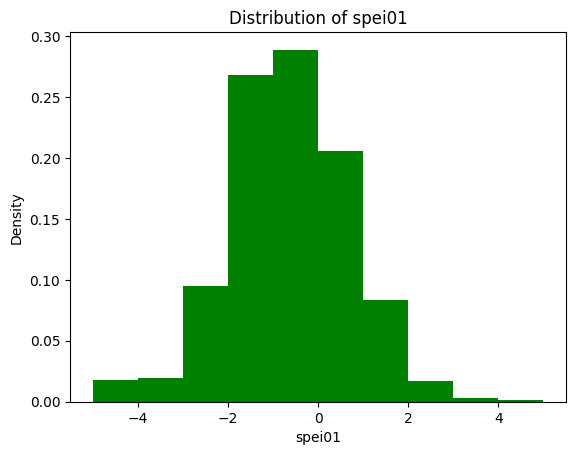

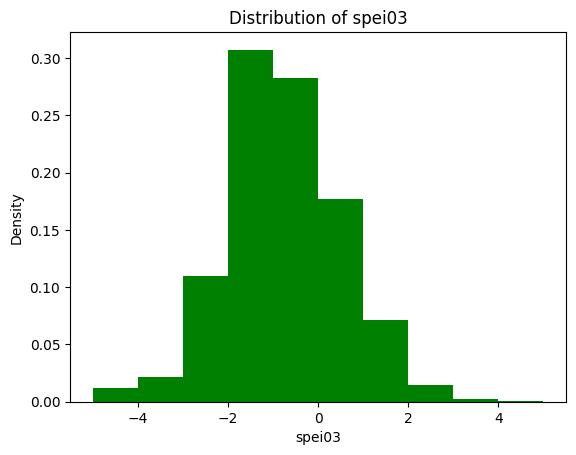

In [ ]:
column_list = dataset.columns.values.tolist()

for col_name in column_list:
    plt.figure()
    plt.hist(dataset[col_name], density = True, color = 'green')
    x_name = col_name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

In [ ]:
dataset['datetime'] = pd.to_datetime(dataset['Month'], format='%Y%m')

In [ ]:
dataset['year'] = dataset['datetime'].dt.year
dataset['month2'] = dataset['datetime'].dt.month

In [ ]:
dataset

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,soil_moisture_pm,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2
0,0,201505,2.695,36.831,292.897,284.173,306.818,286.393,0.017408,0.0,...,0.085525,3372.96,2213.50,296.440,0.000012,-1.691230,-1.961670,2015-05-01,2015,5
1,1,201505,4.492,36.831,291.509,281.289,307.803,284.749,0.021208,0.0,...,0.146752,3204.50,2178.00,296.346,0.000011,-1.675480,-1.874810,2015-05-01,2015,5
2,2,201505,6.288,36.831,291.982,280.979,310.320,285.078,0.040932,0.0,...,0.195196,3771.80,2545.19,295.924,0.000008,-1.147220,-1.466250,2015-05-01,2015,5
3,3,201505,8.085,36.831,292.651,282.872,311.148,285.349,0.040176,0.0,...,0.195139,3253.83,2270.80,296.594,0.000002,-0.818641,-1.169820,2015-05-01,2015,5
4,4,201505,9.881,36.831,293.875,283.338,311.430,284.019,0.018553,0.0,...,0.096890,2806.25,1962.62,296.823,0.000001,-1.383910,-1.045240,2015-05-01,2015,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84633,833,202309,20.661,-33.238,283.751,271.247,299.778,274.649,0.064461,0.0,...,0.142096,2691.06,1399.05,289.569,0.000014,2.631480,1.608050,2023-09-01,2023,9
84634,834,202309,22.458,-33.238,285.763,273.935,307.381,274.665,0.068179,0.0,...,0.153095,2475.70,1238.78,290.677,0.000014,2.011490,1.070890,2023-09-01,2023,9
84635,835,202309,24.255,-33.238,287.129,274.357,309.538,275.504,0.068026,0.0,...,0.146193,2656.24,1294.36,290.756,0.000013,1.811690,1.375040,2023-09-01,2023,9
84636,836,202309,26.051,-33.238,287.760,276.712,308.603,279.086,0.075859,0.0,...,0.146986,4674.79,2363.62,291.747,0.000014,1.394530,0.768887,2023-09-01,2023,9


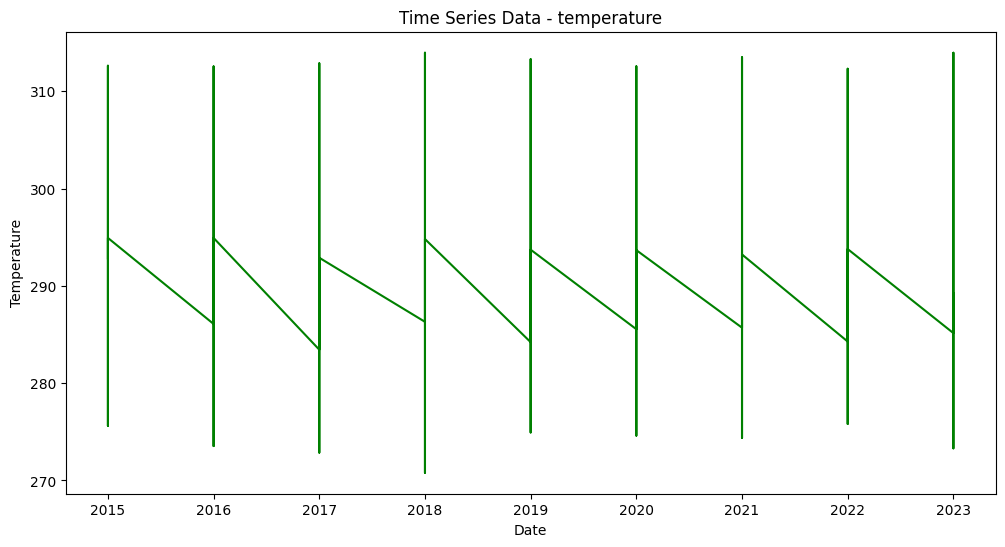

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['year'], dataset['temperature_2m'], color = 'green')
plt.title('Time Series Data - temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()
# how to agregate this for yearly sums?

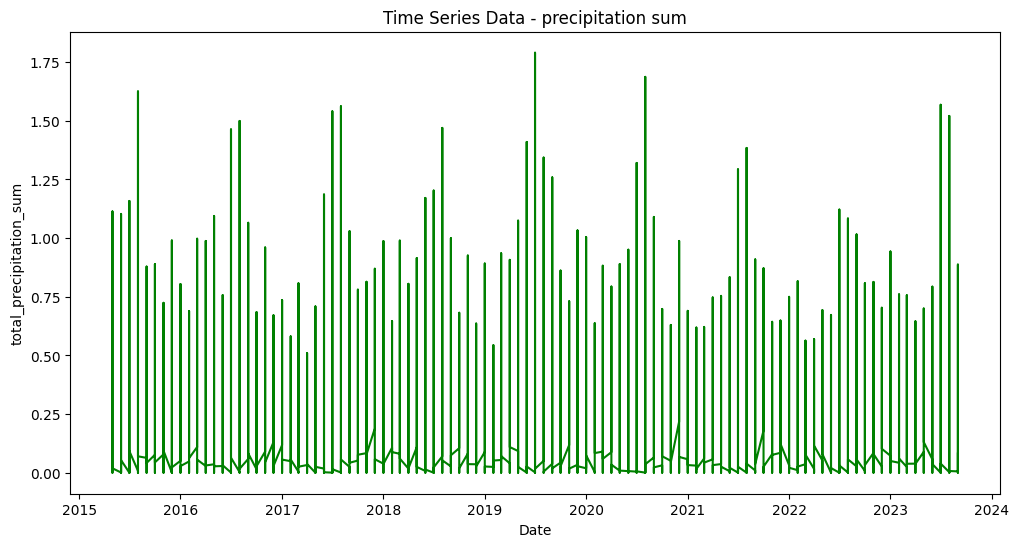

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['datetime'], dataset['total_precipitation_sum'], color = 'green')
plt.title('Time Series Data - precipitation sum')
plt.xlabel('Date')
plt.ylabel('total_precipitation_sum')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['datetime'], dataset['total_precipitation_sum'], color = 'green')
plt.title('Time Series Data - precipitation')
plt.xlabel('Date')
plt.ylabel('total_precipitation_sum')
plt.show()

In [ ]:
# make a map graph of average SPEI in Africa, Max SPEI, min SPEI, or SPEI variability

In [ ]:
dataset.columns

NameError: ignored

In [ ]:
dataset.sort_values(by=['Lat', 'Lon', 'Month'], inplace=True)

In [ ]:
dataset['next_month_soil_moisture_am'] = dataset.groupby(['Lat', 'Lon'])['soil_moisture_am'].shift(-1)

In [ ]:
dataset

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
287,287,201505,-17.068,15.271,297.249,291.684,304.108,292.141,0.000248,0.000000e+00,...,1557.17,1132.95,303.650,3.938450e-06,-1.030740,-0.937773,2015-05-01,2015,5,0.148753
1125,287,201506,-17.068,15.271,298.479,292.966,307.924,293.551,0.000030,0.000000e+00,...,1507.68,1116.97,302.250,3.481040e-06,-1.983540,-1.747770,2015-06-01,2015,6,0.169415
1963,287,201507,-17.068,15.271,300.038,296.358,304.813,295.583,0.039828,0.000000e+00,...,1814.58,1368.95,302.435,1.429650e-05,-0.773948,-1.519480,2015-07-01,2015,7,0.229645
2801,287,201508,-17.068,15.271,300.277,297.167,304.959,297.178,0.201599,8.638150e-08,...,3233.08,2475.59,303.790,6.708030e-05,1.125420,0.176900,2015-08-01,2015,8,0.226260
3639,287,201509,-17.068,15.271,300.453,296.962,304.370,297.498,0.118411,8.523460e-07,...,3829.11,2849.36,304.714,1.539020e-06,0.593335,0.588032,2015-09-01,2015,9,0.155879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80835,387,202305,51.204,11.678,301.408,294.354,307.231,295.266,0.019854,3.091570e-07,...,1694.04,1210.34,305.717,4.468630e-07,0.317675,0.610513,2023-05-01,2023,5,0.147549
81673,387,202306,51.204,11.678,302.933,296.843,309.328,292.453,0.000158,0.000000e+00,...,1555.81,1144.27,305.315,3.380950e-08,0.585810,0.947582,2023-06-01,2023,6,0.146490
82511,387,202307,51.204,11.678,304.032,299.200,309.950,290.167,0.000038,0.000000e+00,...,1414.49,1043.21,303.643,4.085260e-06,1.418990,0.833237,2023-07-01,2023,7,0.148758
83349,387,202308,51.204,11.678,303.200,298.097,310.122,290.921,0.000185,0.000000e+00,...,1426.96,1060.97,304.022,8.440640e-07,0.518092,0.864057,2023-08-01,2023,8,0.151262


In [ ]:
dataset["soil_moisture_am"]

287      0.138518
1125     0.148753
1963     0.169415
2801     0.229645
3639     0.226260
           ...   
80835    0.147807
81673    0.147549
82511    0.146490
83349    0.148758
84187    0.151262
Name: soil_moisture_am, Length: 84416, dtype: float64

In [ ]:
dataset["next_month_soil_moisture_am"]

287      0.148753
1125     0.169415
1963     0.229645
2801     0.226260
3639     0.155879
           ...   
80835    0.147549
81673    0.146490
82511    0.148758
83349    0.151262
84187         NaN
Name: next_month_soil_moisture_am, Length: 84416, dtype: float64

In [ ]:
dataset.isna().sum()

Unnamed: 0                           0
Month                                0
Lat                                  0
Lon                                  0
temperature_2m                       0
temperature_2m_min                   0
temperature_2m_max                   0
dewpoint_temperature_2m              0
total_precipitation_sum              0
total_precipitation_min              0
total_precipitation_max              0
u_component_of_wind_10m              0
v_component_of_wind_10m              0
surface_net_solar_radiation_sum      0
total_evaporation_sum                0
soil_moisture_am                     0
soil_moisture_pm                     0
NDVI                                 0
EVI                                  0
next_month_tempreature               0
next_month_precipitation             0
spei01                               0
spei03                               0
datetime                             0
year                                 0
month2                   

In [ ]:
dataset.dropna(subset=["next_month_soil_moisture_am"], inplace=True)

In [ ]:
dataset.isna().sum()

Unnamed: 0                         0
Month                              0
Lat                                0
Lon                                0
temperature_2m                     0
temperature_2m_min                 0
temperature_2m_max                 0
dewpoint_temperature_2m            0
total_precipitation_sum            0
total_precipitation_min            0
total_precipitation_max            0
u_component_of_wind_10m            0
v_component_of_wind_10m            0
surface_net_solar_radiation_sum    0
total_evaporation_sum              0
soil_moisture_am                   0
soil_moisture_pm                   0
NDVI                               0
EVI                                0
next_month_tempreature             0
next_month_precipitation           0
spei01                             0
spei03                             0
datetime                           0
year                               0
month2                             0
next_month_soil_moisture_am        0
d

In [ ]:
#save processed dataframe to csv
dataset.to_csv('/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km.csv')

In [ ]:
processed_dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km.csv")

In [ ]:
processed_dataset

,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
0,287,287,201505,-17.068,15.271,297.249,291.684,304.108,292.141,0.000248,...,1557.17,1132.95,303.650,3.938450e-06,-1.030740,-0.937773,2015-05-01,2015,5,0.148753
1,1125,287,201506,-17.068,15.271,298.479,292.966,307.924,293.551,0.000030,...,1507.68,1116.97,302.250,3.481040e-06,-1.983540,-1.747770,2015-06-01,2015,6,0.169415
2,1963,287,201507,-17.068,15.271,300.038,296.358,304.813,295.583,0.039828,...,1814.58,1368.95,302.435,1.429650e-05,-0.773948,-1.519480,2015-07-01,2015,7,0.229645
3,2801,287,201508,-17.068,15.271,300.277,297.167,304.959,297.178,0.201599,...,3233.08,2475.59,303.790,6.708030e-05,1.125420,0.176900,2015-08-01,2015,8,0.226260
4,3639,287,201509,-17.068,15.271,300.453,296.962,304.370,297.498,0.118411,...,3829.11,2849.36,304.714,1.539020e-06,0.593335,0.588032,2015-09-01,2015,9,0.155879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,79997,387,202304,51.204,11.678,299.834,294.269,306.253,293.895,0.005088,...,1735.93,1300.87,303.895,1.717400e-06,1.432950,0.334410,2023-04-01,2023,4,0.147807
83576,80835,387,202305,51.204,11.678,301.408,294.354,307.231,295.266,0.019854,...,1694.04,1210.34,305.717,4.468630e-07,0.317675,0.610513,2023-05-01,2023,5,0.147549
83577,81673,387,202306,51.204,11.678,302.933,296.843,309.328,292.453,0.000158,...,1555.81,1144.27,305.315,3.380950e-08,0.585810,0.947582,2023-06-01,2023,6,0.146490
83578,82511,387,202307,51.204,11.678,304.032,299.200,309.950,290.167,0.000038,...,1414.49,1043.21,303.643,4.085260e-06,1.418990,0.833237,2023-07-01,2023,7,0.148758


In [ ]:
processed_dataset.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Month', 'Lat', 'Lon', 'temperature_2m',
       'dewpoint_temperature_2m', 'total_precipitation_sum',
       'u_component_of_wind_10m', 'v_component_of_wind_10m',
       'surface_net_solar_radiation_sum', 'total_evaporation_sum',
       'soil_moisture_am', 'soil_moisture_pm', 'NDVI', 'EVI',
       'next_month_tempreature', 'next_month_precipitation', 'spei01',
       'spei03', 'datetime', 'year', 'month2', 'next_month_soil_moisture_am'],
      dtype='object')

Removing Uneccesary Columns:

In [ ]:
processed_dataset = processed_dataset.drop(["temperature_2m_min", "temperature_2m_max", "total_precipitation_min", "total_precipitation_max"], axis = 1)

In [ ]:
processed_dataset

,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,dewpoint_temperature_2m,total_precipitation_sum,u_component_of_wind_10m,v_component_of_wind_10m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
0,287,287,201505,-17.068,15.271,297.249,292.141,0.000248,2.659130,-1.848650,...,1557.17,1132.95,303.650,3.938450e-06,-1.030740,-0.937773,2015-05-01,2015,5,0.148753
1,1125,287,201506,-17.068,15.271,298.479,293.551,0.000030,3.402230,-1.018750,...,1507.68,1116.97,302.250,3.481040e-06,-1.983540,-1.747770,2015-06-01,2015,6,0.169415
2,1963,287,201507,-17.068,15.271,300.038,295.583,0.039828,3.236410,-0.673368,...,1814.58,1368.95,302.435,1.429650e-05,-0.773948,-1.519480,2015-07-01,2015,7,0.229645
3,2801,287,201508,-17.068,15.271,300.277,297.178,0.201599,1.689200,0.293714,...,3233.08,2475.59,303.790,6.708030e-05,1.125420,0.176900,2015-08-01,2015,8,0.226260
4,3639,287,201509,-17.068,15.271,300.453,297.498,0.118411,1.458800,-0.472105,...,3829.11,2849.36,304.714,1.539020e-06,0.593335,0.588032,2015-09-01,2015,9,0.155879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,79997,387,202304,51.204,11.678,299.834,293.895,0.005088,-1.826640,1.736470,...,1735.93,1300.87,303.895,1.717400e-06,1.432950,0.334410,2023-04-01,2023,4,0.147807
83576,80835,387,202305,51.204,11.678,301.408,295.266,0.019854,-0.682069,1.360860,...,1694.04,1210.34,305.717,4.468630e-07,0.317675,0.610513,2023-05-01,2023,5,0.147549
83577,81673,387,202306,51.204,11.678,302.933,292.453,0.000158,0.066167,1.913830,...,1555.81,1144.27,305.315,3.380950e-08,0.585810,0.947582,2023-06-01,2023,6,0.146490
83578,82511,387,202307,51.204,11.678,304.032,290.167,0.000038,0.905675,3.556180,...,1414.49,1043.21,303.643,4.085260e-06,1.418990,0.833237,2023-07-01,2023,7,0.148758


Combining Soil Moisure and Wind

In [ ]:
processed_dataset["soil_moisture"] = (processed_dataset['soil_moisture_am'] + processed_dataset['soil_moisture_pm'])/2

In [ ]:
processed_dataset.isna().sum()

Unnamed: 0.1                       0
Unnamed: 0                         0
Month                              0
Lat                                0
Lon                                0
temperature_2m                     0
temperature_2m_min                 0
temperature_2m_max                 0
dewpoint_temperature_2m            0
total_precipitation_sum            0
total_precipitation_min            0
total_precipitation_max            0
u_component_of_wind_10m            0
v_component_of_wind_10m            0
surface_net_solar_radiation_sum    0
total_evaporation_sum              0
soil_moisture_am                   0
soil_moisture_pm                   0
NDVI                               0
EVI                                0
next_month_tempreature             0
next_month_precipitation           0
spei01                             0
spei03                             0
datetime                           0
year                               0
month2                             0
n

In [ ]:
sample_processed_dataset = processed_dataset.iloc[:20000]

In [ ]:
sample_processed_dataset

NameError: ignored

In [ ]:
X_sm = processed_dataset[['Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2']]
y_sm = processed_dataset['next_month_soil_moisture_am']

In [ ]:
# 5. Split data into training and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# 6. Initialize and train the Random Forest regressor
rf_regressor_sm = RandomForestRegressor(n_estimators=100, random_state=42, verbose = 2)
rf_regressor_sm.fit(X_train_sm, y_train_sm)

# 7. Predict on the test set
y_pred_sm = rf_regressor_sm.predict(X_test_sm)

# 8. Evaluate the model
mse = mean_squared_error(y_test_sm, y_pred_sm)
print(f"Soil Moisture Prediction Mean Squared Error: {mse}")

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed: 21.8min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    8.5s


Mean Squared Error: 0.0003010407172210646


**ACTUAL CODE AND TESTING BEGINS HERE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [26]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
mei_dict = {
    '201505': 1, '201506': 1.9, '201507': 1.7, '201508': 1.9, '201509': 2.2,
    '201510': 2.1, '201511': 1.9, '201512': 1.9, '201601': 2, '201602': 1.8,
    '201603': 1.3, '201604': 1.3, '201605': 1.3, '201606': 0.4, '201607': -0.5,
    '201608': -0.3, '201609': -0.3, '201610': -0.6, '201611': -0.5, '201612': -0.3,
    '201701': -0.4, '201702': -0.4, '201703': -0.6, '201704': -0.2, '201705': 0.2,
    '201706': -0.3, '201707': -0.7, '201708': -0.8, '201709': -0.8, '201710': -0.6,
    '201711': -0.6, '201712': -0.7, '201801': -0.8, '201802': -0.7, '201803': -0.8,
    '201804': -1.3, '201805': -0.9, '201806': -0.5, '201807': -0.2, '201808': 0.4,
    '201809': 0.5, '201810': 0.4, '201811': 0.3, '201812': 0.1, '201901': 0.1,
    '201902': 0.5, '201903': 0.8, '201904': 0.3, '201905': 0.3, '201906': 0.4,
    '201907': 0.2, '201908': 0.3, '201909': 0.1, '201910': 0.3, '201911': 0.5,
    '201912': 0.4, '202001': 0.3, '202002': 0.3, '202003': 0.2, '202004': -0.1,
    '202005': -0.2, '202006': -0.7, '202007': -1, '202008': -1, '202009': -1.2,
    '202010': -1.2, '202011': -1.1, '202012': -1.2, '202101': -1.2, '202102': -0.9,
    '202103': -0.8, '202104': -1, '202105': -1.1, '202106': -1.1, '202107': -1.5,
    '202108': -1.3, '202109': -1.4, '202110': -1.5, '202111': -1.4, '202112': -1.2,
    '202201': -1, '202202': -1, '202203': -1.3, '202204': -1.6, '202205': -1.7,
    '202206': -1.9, '202207': -2.2, '202208': -1.8, '202209': -1.8, '202210': -1.8,
    '202211': -1.5, '202212': -1.3, '202301': -1.1, '202302': -0.9, '202303': -0.7,
    '202304': -0.4, '202305': -0.1, '202306': 0.4, '202307': 0.4, '202308': 0.5
}

In [27]:
processed_dataset['MEI'] = None

# Loop through each row and update the MEI column
for index, row in processed_dataset.iterrows():
    month = row['Month']
    processed_dataset.at[index, 'MEI'] = mei_dict.get(str(month))

In [8]:
#processed_dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km_version2_1_month_lag.csv")

processed_dataset=pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km_version2_1_month_lag_normalizedV1.csv")
processed_dataset.describe()

,Unnamed: 0,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01
count,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,...,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000
mean,41789.500000,201906.427614,6.426204,18.674333,0.566073,0.523528,0.616149,0.680634,0.627456,0.623594,...,0.355155,0.294809,0.574940,0.077142,0.435318,0.423864,0.499910,0.499946,0.203024,0.435303
std,24127.612087,242.792918,17.759911,15.790527,0.253463,0.231288,0.138251,0.152096,0.140827,0.225205,...,0.284145,0.229432,0.157630,0.125326,0.134340,0.128545,0.304121,0.308172,0.194927,0.134487
min,0.000000,201505.000000,-33.238000,-17.068000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20894.750000,201705.000000,-6.288000,8.085000,0.384621,0.368423,0.537881,0.586065,0.532270,0.434080,...,0.078629,0.086543,0.492155,0.000162,0.349924,0.339188,0.250000,0.272727,0.046626,0.350065
50%,41789.500000,201906.000000,9.881000,20.661000,0.615379,0.552628,0.627918,0.717181,0.619225,0.639959,...,0.283378,0.222722,0.588457,0.011046,0.432775,0.414981,0.500000,0.454545,0.134407,0.432857
75%,62684.250000,202107.000000,20.661000,29.644000,0.769227,0.684204,0.702787,0.799416,0.731203,0.830981,...,0.605967,0.479806,0.675972,0.106523,0.524657,0.507759,0.750000,0.727273,0.308346,0.524755
max,83579.000000,202308.000000,36.831000,51.204000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
processed_dataset["MEI"]

0          1
1        1.9
2        1.7
3        1.9
4        2.2
        ... 
83575   -0.4
83576   -0.1
83577    0.4
83578    0.4
83579    0.5
Name: MEI, Length: 83580, dtype: object

In [ ]:
processed_dataset

In [29]:
processed_dataset.columns

Index(['Unnamed: 0', 'Month', 'Lat', 'Lon', 'Lat_nom', 'Lon_nom',
       'temperature_2m', 'temperature_2m_min', 'temperature_2m_max',
       'dewpoint_temperature_2m', 'total_precipitation_sum',
       'total_precipitation_min', 'total_precipitation_max',
       'u_component_of_wind_10m', 'v_component_of_wind_10m',
       'surface_net_solar_radiation_sum', 'total_evaporation_sum',
       'soil_moisture_am', 'soil_moisture_pm', 'NDVI', 'EVI',
       'next_month_tempreature', 'next_month_precipitation', 'spei01',
       'spei03', 'year', 'month2', 'next_month_soil_moisture_am',
       'next_month_spei01', 'datetime', 'MEI'],
      dtype='object')

In [30]:
train_months = [201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512,
201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608,
201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704,
201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712,
201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808,
201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904,
201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912,
202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008,
202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108, 202109,
202110, 202111, 202112, 202201, 202202, 202203, 202204, 202205]
test_months = [202206, 202207, 202208, 202209, 202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305, 202306, 202307, 202308]

In [31]:
train = processed_dataset[processed_dataset["Month"].isin(train_months)]
test = processed_dataset[processed_dataset["Month"].isin(test_months)]

In [32]:
train.describe()

,Unnamed: 0,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01
count,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,...,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000
mean,41787.380383,201844.129412,6.423592,18.677666,0.566036,0.523577,0.615041,0.679158,0.626703,0.622897,...,0.355111,0.294863,0.572752,0.076664,0.433573,0.420148,0.422059,0.498396,0.201515,0.434033
std,24129.651463,207.423892,17.759399,15.791407,0.253456,0.231301,0.137978,0.152368,0.140754,0.226980,...,0.284824,0.229869,0.157482,0.124410,0.132309,0.126703,0.260076,0.312320,0.194389,0.132225
min,0.000000,201505.000000,-33.238000,-17.068000,0.000000,0.000000,0.000000,0.000000,0.061412,0.000000,...,0.000000,0.000000,0.004075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20895.000000,201702.000000,-6.737250,8.085000,0.378209,0.368423,0.537351,0.584515,0.531856,0.431325,...,0.078274,0.086245,0.490381,0.000143,0.349571,0.337206,0.250000,0.272727,0.045773,0.350091
50%,41788.000000,201811.000000,9.881000,20.661000,0.615379,0.552628,0.627604,0.715882,0.619163,0.639832,...,0.281476,0.221701,0.587182,0.010687,0.430489,0.411328,0.375000,0.454545,0.133203,0.430915
75%,62684.000000,202008.000000,20.661000,30.093250,0.769227,0.690785,0.701365,0.798710,0.730294,0.832298,...,0.607232,0.480805,0.673227,0.106995,0.521782,0.502700,0.625000,0.727273,0.305823,0.522116
max,83564.000000,202205.000000,36.831000,51.204000,1.000000,1.000000,1.000000,1.000000,0.994163,1.000000,...,1.000000,1.000000,0.988108,1.000000,1.000000,1.000000,0.875000,1.000000,0.997858,1.000000


In [33]:
# 4. Split data into features (X) and target (y)

#BEFORE COLUMN REMOVAL
X_train = train[['Lat_nom', 'Lon_nom', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'month2', 'spei01', "MEI"]]
y_train = train['next_month_spei01']

# X = processed_dataset[['Lat', 'Lon', 'temperature_2m','dewpoint_temperature_2m',
#        'total_precipitation_sum', 'u_component_of_wind_10m',
#        'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
#        'total_evaporation_sum', 'soil_moisture', 'NDVI',
#        'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2']]
# y = processed_dataset['spei01']

X_test = test[['Lat_nom', 'Lon_nom', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'month2', 'spei01', "MEI"]]

y_test = test['next_month_spei01']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to calculate drop-column feature importance
def drop_column_feature_importance(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    baseline_pred = model.predict(X_test)
    baseline_performance = mean_squared_error(y_test, baseline_pred)
    importances = {}
    for col in X_train.columns:
        X_train_dropped = X_train.drop(col, axis=1)
        X_test_dropped = X_test.drop(col, axis=1)
        model.fit(X_train_dropped, y_train)
        pred = model.predict(X_test_dropped)
        performance = mean_squared_error(y_test, pred)
        importances[col] = baseline_performance - performance
    return importances

# Initialize your model
model = RandomForestRegressor(n_estimators=80, random_state=42, verbose = 2, max_depth = 10)

# Calculate drop-column feature importance
importances = drop_column_feature_importance(X_train, X_test, y_train, y_test, model)

# Graphing the feature importances
features = list(importances.keys())
importance_scores = list(importances.values())

# Sorting the features by importance
sorted_indices = np.argsort(importance_scores)[::-1]
sorted_features = [features[index] for index in sorted_indices]
sorted_importances = [importance_scores[index] for index in sorted_indices]

# Creating the plot
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_features)), sorted_importances, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Importance Score (Decrease in Model Performance)')
plt.title('Feature Importances (Drop-Column Method)')
plt.gca().invert_yaxis() # Invert the y-axis to have the most important feature at the top
plt.show()

building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   33.0s


building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   31.8s


building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   32.0s


building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   30.8s


building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   31.3s


building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   30.9s


building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   30.8s


building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   30.8s


building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   32.0s


building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   30.9s


building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   30.9s


building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   30.7s


building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80


KeyboardInterrupt: 

In [34]:
# 5. Split data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, verbose = 2, max_depth = 2000, max_features=1)
rf_regressor.fit(X_train, y_train)

# 7. Predict on the test set
y_pred_train = rf_regressor.predict(X_train)

# 8. Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)

print(f"Mean Squared Error Train: {mse_train}")

# 7. Predict on the test set
y_pred = rf_regressor.predict(X_test)

# 8. Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

# 9. Use the model for new predictions (if necessary)
# new_data = [[____NEW_FEATURE_1_VALUE____, ____NEW_FEATURE_2_VALUE____, ____...____]]
# new_prediction = rf_regressor.predict(new_data)
# print(f"Prediction for new data: {new_prediction}")

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    4.9s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.8s


Mean Squared Error Train: 0.0014709443429357968


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s


Mean Squared Error: 0.017716786517896564


100 estimators, max_depth = 20

Mean Squared Error Train: 0.002882239107781296

Mean Squared Error: 0.010416056141036387

In [ ]:
y_pred

array([0.47533779, 0.47589803, 0.48921914, ..., 0.65381294, 0.66087803,
       0.6062938 ])

In [ ]:
y_test

85       0.625756
86       0.564176
87       0.615084
88       0.502816
89       0.348555
           ...   
83575    0.531767
83576    0.558581
83577    0.641899
83578    0.551809
83579    0.455213
Name: next_month_spei01, Length: 12520, dtype: float64

In [35]:
df = pd.DataFrame({
    'y_test': 10*y_test-5,
    'y_pred': (10*y_pred-5)
})

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

predicted_values=df["y_pred"]
actual_values=df["y_test"]
# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_values, predicted_values)


# Calculate Mean Squared Error
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error
rmse = sqrt(mse)

# Calculate R-squared
r2 = r2_score(actual_values, predicted_values)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 1.7716786517896563
Mean Absolute Error (MAE): 1.0142110696335798
Root Mean Squared Error (RMSE): 1.3310441960316932
R-squared (R²): 0.1740462850343969


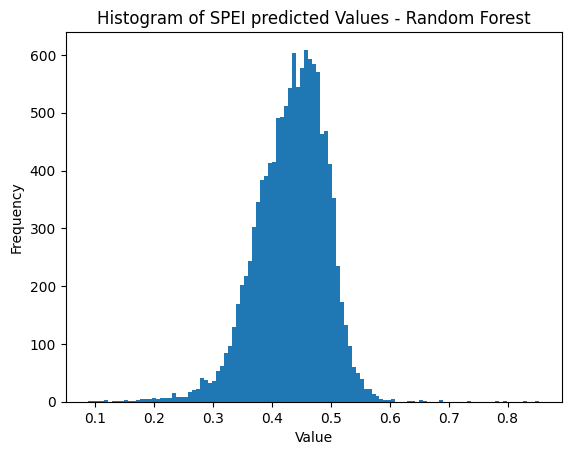

In [ ]:
plt.hist(y_pred, bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.title('Histogram of SPEI predicted Values - Random Forest')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

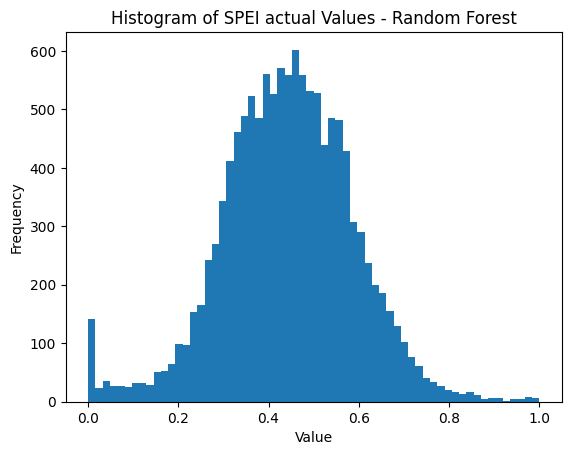

In [ ]:
plt.hist(y_test, bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.title('Histogram of SPEI actual Values - Random Forest')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
df

,y_test,y_pred
85,1.257560,-0.246622
86,0.641762,-0.241020
87,1.150840,-0.107809
88,0.028160,-0.361446
89,-1.514450,-1.293304
...,...,...
83575,0.317675,0.623172
83576,0.585810,0.487170
83577,1.418990,1.538129
83578,0.518092,1.608780


In [ ]:
df.describe()

,y_test,y_pred
count,12520.000000,12520.000000
mean,-0.574912,-0.644014
std,1.464644,0.539991
min,-5.000000,-3.470415
25%,-1.500363,-0.979693
50%,-0.548688,-0.573088
75%,0.398345,-0.221845
max,5.000000,3.016137


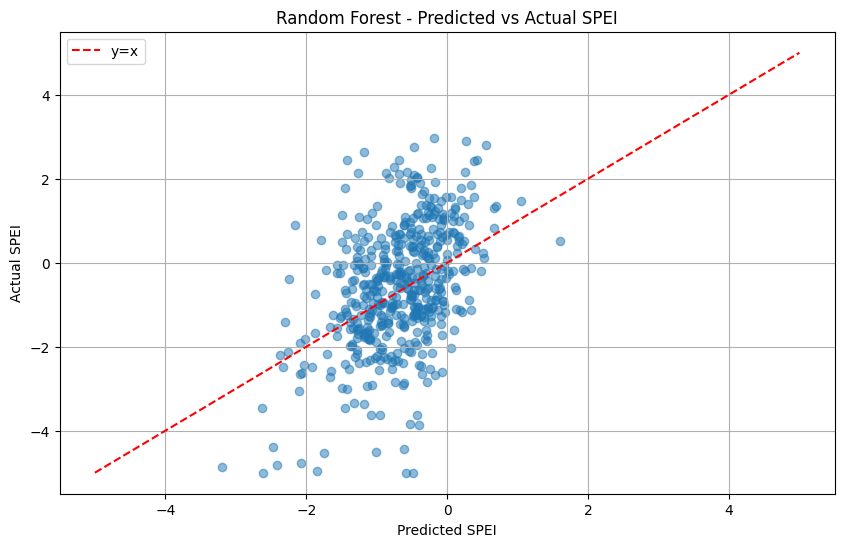

In [ ]:
# Sample 100 points from the DataFrame
sampled_df = df.sample(n=500, random_state=42)  # Set random_state for reproducibility
#sampled_df=df3
plt.figure(figsize=(10, 6))
plt.scatter(sampled_df['y_pred'], sampled_df['y_test'], alpha=0.5)

# Add a 45-degree line (y = x)
plt.plot([-5, 5], [-5, 5], color='red', linestyle='--', label='y=x')

plt.title('Random Forest - Predicted vs Actual SPEI')
plt.xlabel('Predicted SPEI')
plt.ylabel('Actual SPEI')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred-y_test

85      -0.150418
86      -0.088278
87      -0.125865
88      -0.038961
89       0.022115
           ...   
83575    0.030550
83576   -0.009864
83577    0.011914
83578    0.109069
83579    0.151081
Name: next_month_spei01, Length: 12520, dtype: float64

In [ ]:
test_geo_dataset = test.copy(deep=True)
test_geo_dataset["y_test"] = y_test
test_geo_dataset["y_pred"] = y_pred

In [ ]:
test_geo_dataset["Absolute_Diff"] = abs(test_geo_dataset["y_test"]-test_geo_dataset["y_pred"])

In [ ]:
test_geo_dataset.describe()

,Unnamed: 0,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01,y_test,y_pred,Absolute_Diff
count,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,...,1.252000e+04,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000
mean,41801.530351,202260.014696,6.441029,18.655412,0.566285,0.523251,0.622435,0.689009,0.631729,0.627547,...,7.985815e-02,0.445222,0.444952,0.941773,0.508742,0.211588,0.442509,0.442509,0.432774,0.101220
std,24116.993683,47.689202,17.763517,15.786146,0.253515,0.231224,0.139634,0.150275,0.141166,0.214814,...,1.303744e-01,0.144935,0.136637,0.062356,0.283335,0.197745,0.146464,0.146464,0.059779,0.085815
min,85.000000,202206.000000,-33.238000,-17.068000,0.000000,0.000000,0.043065,0.130956,0.000000,0.117485,...,3.316249e-16,0.000000,0.000000,0.875000,0.000000,0.000003,0.000000,0.000000,0.088763,0.000012
25%,20894.750000,202209.000000,-6.288000,8.085000,0.384621,0.368423,0.540889,0.596091,0.534131,0.448352,...,3.183548e-04,0.352478,0.351642,0.875000,0.272727,0.051362,0.349964,0.349964,0.395882,0.037466
50%,41789.500000,202301.000000,9.881000,20.661000,0.615379,0.552628,0.629871,0.725708,0.619534,0.640774,...,1.288451e-02,0.447545,0.440116,1.000000,0.545455,0.140532,0.445131,0.445131,0.438356,0.080439
75%,62684.250000,202305.000000,20.661000,29.644000,0.769227,0.684204,0.711112,0.803480,0.736490,0.824103,...,1.046278e-01,0.541227,0.532313,1.000000,0.727273,0.324023,0.539834,0.539834,0.474628,0.141439
max,83579.000000,202308.000000,36.831000,51.204000,1.000000,1.000000,0.996721,0.989627,1.000000,0.983864,...,9.021469e-01,1.000000,0.992259,1.000000,1.000000,1.000000,1.000000,1.000000,0.853400,0.690048


In [ ]:
test_geo_dataset['Predicted'] = test_geo_dataset['y_pred']
test_geo_dataset['Actual'] = test_geo_dataset['y_test']
test_geo_dataset['AE'] = test_geo_dataset['Absolute_Diff']

result_file_path = '/content/drive/MyDrive/DroughtCastAI/RandomForestRunresult2_with_AE.csv'
test_geo_dataset.to_csv(result_file_path, index=False)

<ipython-input-17-da72e9abef14>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


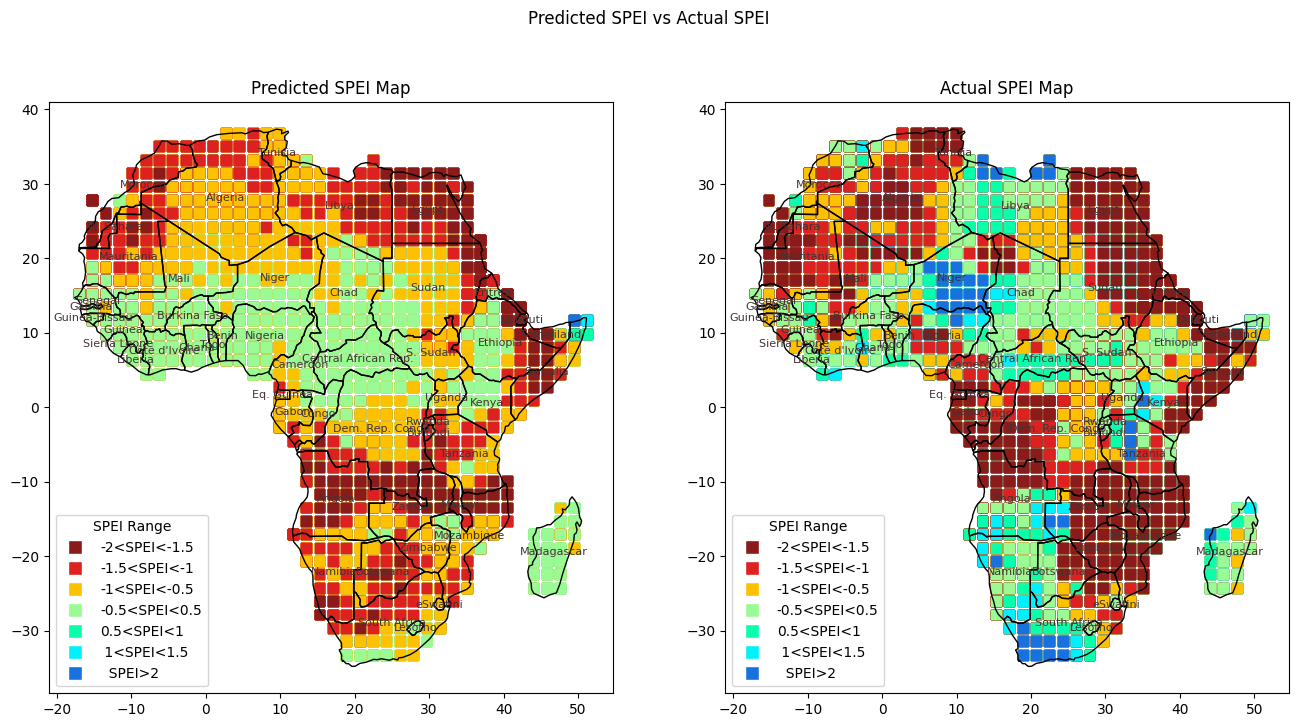

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the world map dataset with country borders
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only African countries
africa = world[world['continent'] == 'Africa']

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(test_geo_dataset, geometry=gpd.points_from_xy(test_geo_dataset['Lon'], test_geo_dataset['Lat']))

# Define colors based on predicted values
predicted_colors = []
for value in test_geo_dataset['y_pred']:
    if value <= 0.35:
        predicted_colors.append('#8B1A1A')  # Dark Red
    elif value <= 0.4:
        predicted_colors.append('#DD2020')  # Red-Orange
    elif value <= 0.45:
        predicted_colors.append('#FDC100')  # Dark Orange
    elif value <= 0.55:
        predicted_colors.append('#9AFA94')  # Gold
    elif value <= 0.6:
        predicted_colors.append('#09FFAA')  # Yellow
    elif value <= 0.65:
        predicted_colors.append('#00F1FD')  # Orange
    elif value <= 1:
        predicted_colors.append('#1771DE')  # Dark Orange
    else:
        print("value is", value)
        predicted_colors.append('#FF0000')  # Dark Red (fallback)

# Define colors based on actual values
actual_colors = []
for value in test_geo_dataset['y_test']:
    if value <= 0.35:
        actual_colors.append('#8B1A1A')  # Dark Red
    elif value <= 0.4:
        actual_colors.append('#DD2020')  # Red-Orange
    elif value <= 0.45:
        actual_colors.append('#FDC100')  # Dark Orange
    elif value <= 0.55:
        actual_colors.append('#9AFA94')  # Gold
    elif value <= 0.6:
        actual_colors.append('#09FFAA')  # Yellow
    elif value <= 0.65:
        actual_colors.append('#00F1FD')  # Orange
    elif value <= 1:
        actual_colors.append('#1771DE')  # Dark Orange
    else:
        print("value is", value)
        actual_colors.append('#FF0000')  # Dark Red (fallback)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the filtered African map with country borders and country names for both subplots
for ax in axs:
    africa.boundary.plot(ax=ax, linewidth=1, color='black')
    for idx, row in africa.iterrows():
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['name'], fontsize=8, ha='center', va='center', color='#443333')

# Plot the GeoDataFrame with the defined colors based on predicted values and actual values
gdf.plot(color=predicted_colors, ax=axs[0], marker='s', markersize=50, legend=True, legend_kwds={'label': "Predicted SPEI"})
gdf.plot(color=actual_colors, ax=axs[1], marker='s', markersize=50, legend=True, legend_kwds={'label': "Actual SPEI"})


 # Create a legend for the colors and their corresponding values
legend_labels = {
    '#8B1A1A': 'SPEI<-2',
    '#8B1A1A': '-2<SPEI<-1.5',
    '#DD2020': '-1.5<SPEI<-1',
    '#FDC100': '-1<SPEI<-0.5',
    '#9AFA94': '-0.5<SPEI<0.5',
    '#09FFAA': '0.5<SPEI<1',
    '#00F1FD': ' 1<SPEI<1.5',
    '#1771DE': ' 1.5<SPEI<2',
    '#1771DE': '  SPEI>2',
}
handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, label=label)
           for color, label in legend_labels.items()]

# Add the legend to the plot
axs[0].legend(handles=handles, title="SPEI Range")
axs[1].legend(handles=handles, title="SPEI Range")

# Set titles for subplots
axs[0].set_title('Predicted SPEI Map')
axs[1].set_title('Actual SPEI Map')

# Add an overall title
plt.suptitle("Predicted SPEI vs Actual SPEI")

# Show the plot
plt.show()

In [ ]:
from matplotlib.patches import Patch


<ipython-input-23-4c3ad8c30a1d>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


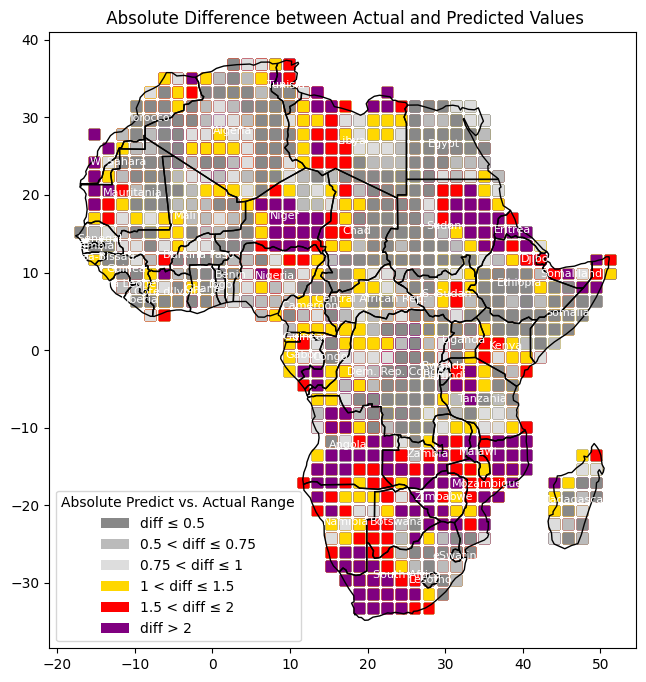

In [ ]:
# Group by 'lat' and 'lon' and calculate the mean of 'AE' for each group
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only African countries
africa = world[world['continent'] == 'Africa']

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(test_geo_dataset, geometry=gpd.points_from_xy(test_geo_dataset['Lon'], test_geo_dataset['Lat']))

# Calculate the absolute difference between actual and predicted values
gdf['Absolute_Difference'] =  gdf['Absolute_Diff']

# Define colors based on the absolute difference values
difference_colors = []
for value in gdf['Absolute_Difference']:
    if value <= 0.05:
        difference_colors.append('#888888')  # Dark Green for absolute difference <= 0.05
    elif value <= 0.075:
        difference_colors.append('#BBBBBB')  # Yellow-Green for absolute difference <= 0.075
    elif value <= 0.1:
        difference_colors.append('#DDDDDD')  # Gold for absolute difference <= 0.1
    elif value <= 0.15:
        difference_colors.append('#FFD700')  # Red-Orange for absolute difference <= 0.15
    elif value <= 0.2:
        difference_colors.append('#FF0000')  # Dark Red for absolute difference <= 0.2
    else:
        difference_colors.append('#800080')  # Purple for absolute difference > 0.2

# Create a subplot for the map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the filtered African map with country borders and country names
africa.boundary.plot(ax=ax, linewidth=1, color='black')
for idx, row in africa.iterrows():
    ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['name'], fontsize=8, ha='center', va='center', color='#FFFFFF')

# Plot the GeoDataFrame with the defined colors based on the absolute difference values
sc = gdf.plot(color=difference_colors, ax=ax, marker='s', markersize=50)

# Define legend labels and colors
legend_labels = {
    'diff ≤ 0.5': '#888888',  # Dark Green for absolute difference <= 0.05
    '0.5 < diff ≤ 0.75': '#BBBBBB',  # Yellow-Green for absolute difference <= 0.075
    '0.75 < diff ≤ 1': '#DDDDDD',  # Gold for absolute difference <= 0.1
    '1 < diff ≤ 1.5': '#FFD700',  # Red-Orange for absolute difference <= 0.15
    '1.5 < diff ≤ 2': '#FF0000',  # Dark Red for absolute difference <= 0.2
    'diff > 2': '#800080',  # Purple for absolute difference > 0.2
}

# Create a legend with color patches and labels
legend_elements = [Patch(facecolor=color, label=label) for label, color in legend_labels.items()]
legend = ax.legend(handles=legend_elements, title='Absolute Predict vs. Actual Range', loc='lower left')

# Set title
plt.title(' Absolute Difference between Actual and Predicted Values')

# Show the map
plt.show()


**TEST Result**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

predicted_values=y_pred
actual_values=y_test
# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_values, predicted_values)


# Calculate Mean Squared Error
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error
rmse = sqrt(mse)

# Calculate R-squared
r2 = r2_score(actual_values, predicted_values)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.010416056141036387
Mean Absolute Error (MAE): 0.0757112793646471
Root Mean Squared Error (RMSE): 0.10205908161960105
R-squared (R²): 0.42558709886966717


In [ ]:
mask = y_test > 0.5

# Apply the mask to both actual and predicted columns
actual_values_filtered = y_test[mask]
predicted_values_corresponding = y_pred[mask]

predicted_values=predicted_values_corresponding
actual_values=actual_values_filtered
# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_values, predicted_values)


# Calculate Mean Squared Error
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error
rmse = sqrt(mse)

# Calculate R-squared
r2 = r2_score(actual_values, predicted_values)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.015781278162776982
Mean Absolute Error (MAE): 0.0997122338604191
Root Mean Squared Error (RMSE): 0.12562355735600303
R-squared (R²): -1.9679907309959335


In [ ]:
mask = y_test < 0.5

# Apply the mask to both actual and predicted columns
actual_values_filtered = y_test[mask]
predicted_values_corresponding = y_pred[mask]

predicted_values=predicted_values_corresponding
actual_values=actual_values_filtered
# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_values, predicted_values)


# Calculate Mean Squared Error
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error
rmse = sqrt(mse)

# Calculate R-squared
r2 = r2_score(actual_values, predicted_values)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.007985967313979435
Mean Absolute Error (MAE): 0.0648404428694304
Root Mean Squared Error (RMSE): 0.08936423957030819
R-squared (R²): 0.1256629606095162


**Result  MSE**

SPEI Mean Squared Error: 0.010079140857792247

In [ ]:
# 5. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_regressor = RandomForestRegressor(random_state=42, verbose = 2)

parameters = {
    'n_estimators': [10, 50, 100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30, 60, 120, 500]
    # ... add other hyperparameters as needed
}

# less_parameters = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 30]
#     # ... add other hyperparameters as needed
# }

# 6. Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=parameters,
                           cv=5, scoring='neg_mean_squared_error', verbose=3, n_jobs=-1)

# 7. Perform grid search
grid_search.fit(X_train, y_train)

#save results into a dataframe to be graphed later
training_results_df = pd.DataFrame(grid_search.cv_results_)

# 8. Get best parameters and best model
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_parameters}")
# 9. Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# 10. Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of Best Model for SPEI: {mse}")

# 11. Use the best model for new predictions (if necessary)
# new_data = [[____NEW_FEATURE_1_VALUE____, ____NEW_FEATURE_2_VALUE____, ____...____]]
# new_prediction = best_model.predict(new_data)
# print(f"Prediction for new data: {new_prediction}")

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.1min


building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  4.4min


building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tre

[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:  9.8min


building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tre

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed: 17.5min


building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tre

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    4.6s


Mean Squared Error of Best Model for SPEI: 0.9891065606578996


Best Parameters: max_depth = 60, n_estimators = 1000
MSE: 0.9891065606578996

In [ ]:
#Saving the model with joblib
import joblib

filename = '/content/drive/MyDrive/DroughtCastAI/Models/Random Forest/SPEI_11/8.sav'
joblib.dump(best_model, filename)

In [ ]:
#retrieving the model from file
loaded_model = joblib.load(filename)

# evaluate model
y_predict = loaded_model.predict(X_test)

mse_loaded = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error: {mse}")

In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.pairwise import rbf_kernel

In [ ]:
! python -m pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.2/75.2 MB 20.1 MB/s eta 0:00:00


In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
#X = sample_processed_dataset[['Lat', 'Lon']]
processed_dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km.csv")
X = processed_dataset[['Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2']]

y = processed_dataset['spei01']

# X = processed_dataset[['Lat', 'Lon', 'temperature_2m','dewpoint_temperature_2m',
#        'total_precipitation_sum', 'u_component_of_wind_10m',
#        'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
#        'total_evaporation_sum', 'soil_moisture', 'NDVI',
#        'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2']]
# y = processed_dataset['spei01']

gamma=0.05
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVR)
scaler = StandardScaler()
# TODO: Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X_train_scaled=X_train
#X_test_scaled=X_test
# Create the SVR model
# TODO: Choose and set the kernel type (e.g., 'linear', 'poly', 'rbf', 'sigmoid')
svr_model = SVR(kernel='rbf',  gamma=gamma, verbose=True)
#svr_model = SVR(kernel=rbf_kernel, gamma=gamma, verbose=True, )

# Train the model using the training sets
svr_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model
# TODO: Print out the mean squared error and the R-squared value to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error: ', mse)
print('R-squared value: ', r2)

[LibSVM]Mean squared error:  1.1758173606293516
R-squared value:  0.34972985747901963


In [ ]:
processed_dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km.csv")
X = processed_dataset[['Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2']]

y = processed_dataset['spei01']

# X = processed_dataset[['Lat', 'Lon', 'temperature_2m','dewpoint_temperature_2m',
#        'total_precipitation_sum', 'u_component_of_wind_10m',
#        'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
#        'total_evaporation_sum', 'soil_moisture', 'NDVI',
#        'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2']]
# y = processed_dataset['spei01']

gamma=0.05
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

svr_model = SVR(kernel='rbf',  gamma=gamma, verbose=True)

parameters = {
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'sigmoid'],
    'C':[1,10,100,1000]
    # ... add other hyperparameters as needed
}

# 6. Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svr_model, param_grid=parameters,
                           cv=5, scoring='neg_mean_squared_error', verbose=3, n_jobs=-1)

# 7. Perform grid search
grid_search.fit(X_train, y_train)

#save results into a dataframe to be graphed later
training_results_df = pd.DataFrame(grid_search.cv_results_)

# 8. Get best parameters and best model
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_parameters}")
# 9. Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# 10. Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of Best Model for SPEI: {mse}")

# 11. Use the best model for new predictions (if necessary)
# new_data = [[____NEW_FEATURE_1_VALUE____, ____NEW_FEATURE_2_VALUE____, ____...____]]
# new_prediction = best_model.predict(new_data)
# print(f"Prediction for new data: {new_prediction}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
